# European electricity production capacities

This notebooks aims at visualising and exporting the installed and available electricity production capacities of selected countries which data is available on the ENTSOE transparency platform.

*Note:* The Swiss installed capacities given by the ENTSOE are incomplete, and the Swiss Federal Office of Energy (SFOE/OFEN) provides a more complete dataset. The SFOE dataset is therefore used to complete the ENTSOE dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ecodynelec.parameter import Parameter

# EcoDynElec configuration
my_config = Parameter()
my_config.freq = "H"
my_config.ctry = ['CH', 'DE', 'FR']#, 'IT']
#my_config.ctry = ['FR']
my_config.start = '2018-01-01'
my_config.end = '2022-12-31'

# Data downloading configuration
my_config.server.useServer = True
my_config.server.username = 'aymericb5@gmail.com'
my_config.server.password = '8.U#Mf48nZn!eqc'

In [3]:
download_path = './downloads/'
ch_data_file = './support_files/ElectricityProductionPlant.csv'

In [4]:
from ecodynelec.progress_info import ProgressInfo
from modelling.entsoe_prod_sources import export_entsoe_real_prod_capacities

installed_capa, outage, outage_detailed, real_capa = export_entsoe_real_prod_capacities(my_config, download_path, ch_data_file=ch_data_file, is_verbose=False, progress_bar=ProgressInfo())

-- NOTE: Columns in generation but not in unavailable capacities --
{'CH': Index([], dtype='object'), 'DE': Index([], dtype='object'), 'FR': Index([], dtype='object')}


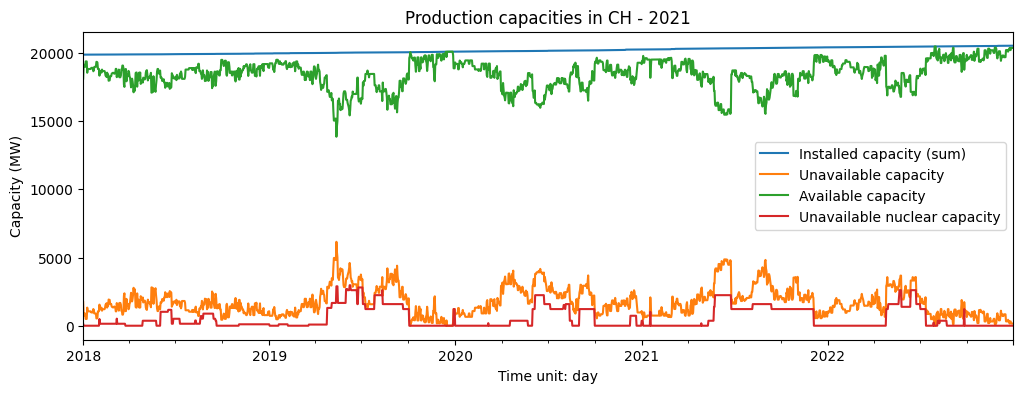

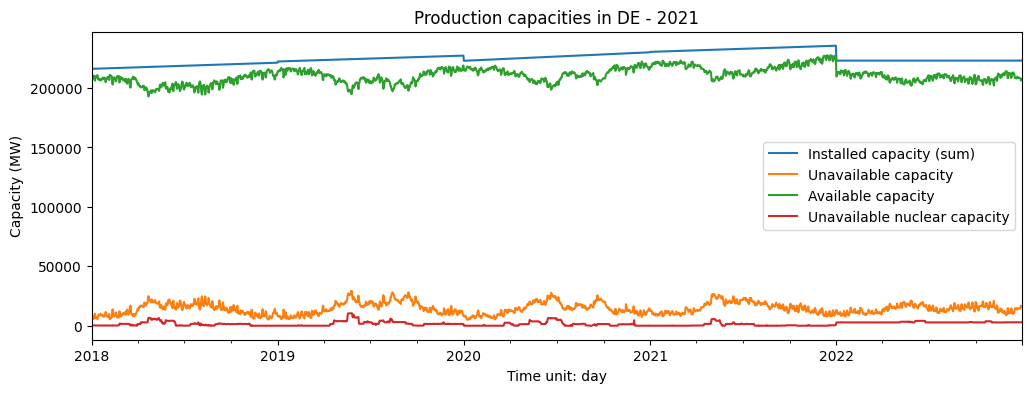

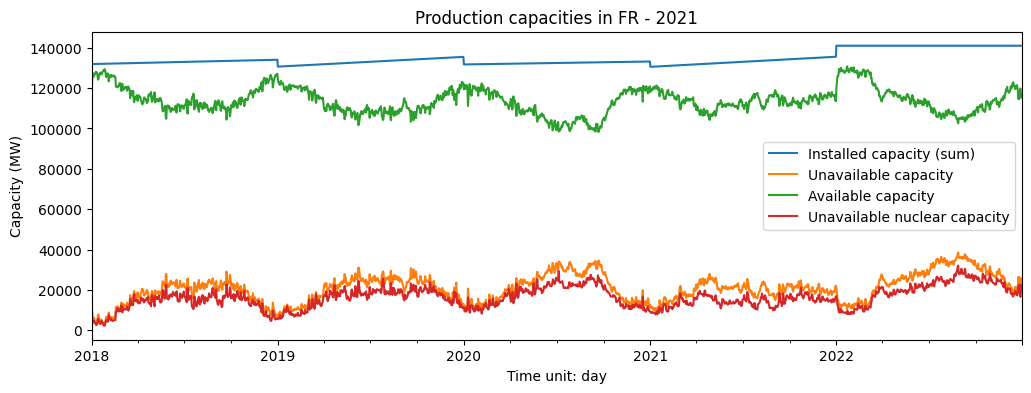

In [32]:
from matplotlib import pyplot as plt

for c in installed_capa.keys():
    plt.figure(figsize=(12, 4))
    installed_capa[c].resample('D').mean().sum(axis=1).plot()
    outage[c].resample('D').mean().sum(axis=1).plot()
    real_capa[c].resample('D').mean().sum(axis=1).plot()
    outage[c]['Nuclear_'+c].resample('D').mean().plot()
    plt.legend(['Installed capacity (sum)', 'Unavailable capacity', 'Available capacity', 'Unavailable nuclear capacity'])
    plt.title(f'Production capacities in {c} - 2021')
    plt.xlabel('Time unit: day')
    plt.ylabel('Capacity (MW)')
    plt.show()

In [45]:
installed_capa['FR']['2021-01-01':'2021-12-31'].resample('Y').mean().T.sort_values(by=['2021-12-31'], ascending=False)

,2021-12-31
Nuclear_FR,61370.000000
Wind_Onshore_FR,18365.963785
Fossil_Gas_FR,12217.680000
Solar_FR,11683.207144
Hydro_Run-of-river_and_poundage_FR,9554.380000
Hydro_Water_Reservoir_FR,6655.250000
Hydro_Pumped_Storage_FR,4655.260000
Fossil_Hard_coal_FR,2976.670000
Fossil_Oil_FR,2745.990000
Biomass_FR,1440.085888


In [31]:
from modelling.entsoe_prod_sources import read_from_csvs

installed_capa = read_from_csvs(['CH', 'DE', 'FR'], 'export_capacities', 'export_capacitiesinstalled_capa')
outage = read_from_csvs(['CH', 'DE', 'FR'], 'export_capacities', 'export_capacitiesoutages')
outage_detailed = read_from_csvs(['CH', 'DE', 'FR'], 'export_capacities', 'export_capacitiesoutages_detailed')
real_capa = read_from_csvs(['CH', 'DE', 'FR'], 'export_capacities', 'export_capacitiesreal_capa')

<Axes: >

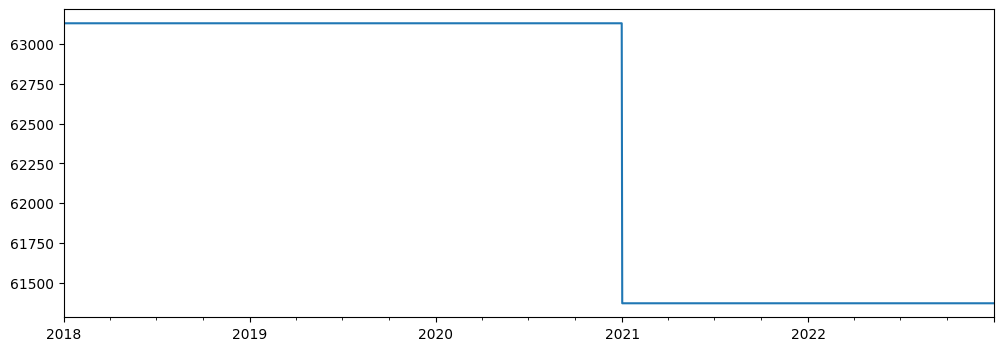

In [29]:
installed_capa['FR'].resample('D').mean()['Nuclear_FR'].plot(figsize=(12,4))

Text(0, 0.5, 'Capacity (MW)')

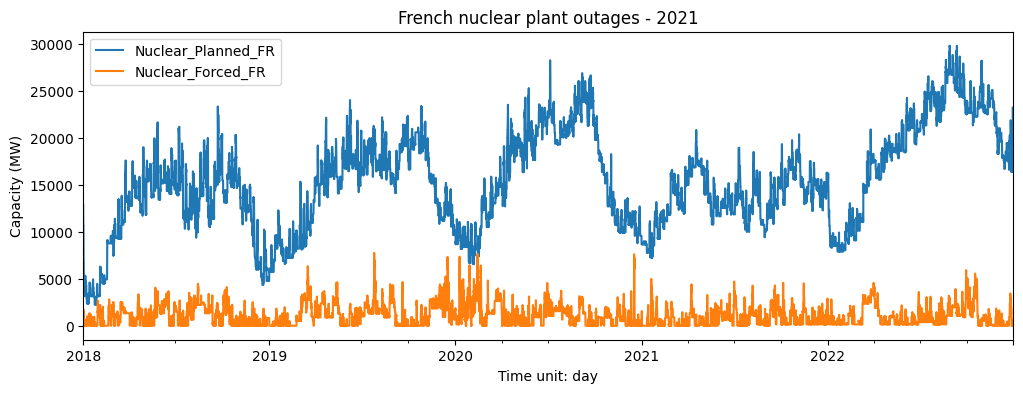

In [8]:
plt.figure(figsize=(12, 4))
outage_detailed['FR']['Nuclear_Planned_FR'].plot()
outage_detailed['FR']['Nuclear_Forced_FR'].plot()
plt.legend()
plt.title(f'French nuclear plant outages - 2021')
plt.xlabel('Time unit: day')
plt.ylabel('Capacity (MW)')

In [5]:
from modelling.entsoe_prod_sources import save_to_csvs

save_to_csvs(installed_capa, 'export_capacities', 'installed_capa')
save_to_csvs(outage, 'export_capacities', 'outages')
save_to_csvs(outage_detailed, 'export_capacities', 'outages_detailed')
save_to_csvs(real_capa, 'export_capacities', 'real_capa')

Résultat attendu pour le Nucléaire FR : 24185 si on cherche entre 01-01-2021 et 31-12-2022